In [1]:
import pandas as pd

# Replace "data.csv" with the actual filename and "column_name" with the desired column
data = pd.read_csv("/content/series_data.csv", usecols=["visits"])

# Access the specific column as a Series
specific_column = data["visits"]

# Print the column
print(specific_column)


0       4
1       8
2       4
3       9
4       7
       ..
495     7
496     8
497    17
498     9
499     6
Name: visits, Length: 500, dtype: int64


In [ ]:
# Import libraries
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

# Define the model
model = ARIMA(data,order=(7,0,1))  # Replace (p, d, q) with your chosen parameters

# Fit the model
model_fit = model.fit()

# Forecast the next 50 days
forecast = model_fit.forecast(steps=50)

# View the results
print(forecast)


In [9]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 10.5 MB/s eta 0:00:00


In [10]:
import pandas as pd
from pmdarima import auto_arima

# Replace "data.csv" with your actual filename and "column_name" with the target column
data = pd.read_csv("/content/series_data.csv", usecols=["visits"])
data = data.iloc[:, 0]  # Assuming "column_name" is the first column


In [13]:
# Define the model with stepwise selection and trace the process
model = auto_arima(
    data,
   start_p=1, start_q=1,
                   max_p=3, max_q=3, m=7,
                   start_P=0, seasonal=True,
                   d=1, D=1, trace=True,
                   error_action='ignore',
                   suppress_warnings=True,
                   stepwise=True, maxiter=10
)

# Print the summary of the selected ARIMA model
print(model.summary())


Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[7]             : AIC=inf, Time=1.85 sec
 ARIMA(0,1,0)(0,1,0)[7]             : AIC=3663.909, Time=0.08 sec
 ARIMA(1,1,0)(1,1,0)[7]             : AIC=3353.624, Time=0.26 sec
 ARIMA(0,1,1)(0,1,1)[7]             : AIC=inf, Time=1.18 sec
 ARIMA(1,1,0)(0,1,0)[7]             : AIC=3516.443, Time=0.11 sec
 ARIMA(1,1,0)(2,1,0)[7]             : AIC=3308.013, Time=0.49 sec
 ARIMA(1,1,0)(2,1,1)[7]             : AIC=inf, Time=1.79 sec
 ARIMA(1,1,0)(1,1,1)[7]             : AIC=inf, Time=0.61 sec
 ARIMA(0,1,0)(2,1,0)[7]             : AIC=3459.635, Time=0.13 sec
 ARIMA(2,1,0)(2,1,0)[7]             : AIC=3250.971, Time=0.25 sec
 ARIMA(2,1,0)(1,1,0)[7]             : AIC=3299.509, Time=0.15 sec
 ARIMA(2,1,0)(2,1,1)[7]             : AIC=inf, Time=1.87 sec
 ARIMA(2,1,0)(1,1,1)[7]             : AIC=inf, Time=1.84 sec
 ARIMA(3,1,0)(2,1,0)[7]             : AIC=3220.684, Time=0.33 sec
 ARIMA(3,1,0)(1,1,0)[7]             : AIC=3272.394, Time=0.17 s

In [37]:

model.aic()
model.fit(data)

ARIMA(order=(3, 1, 0), scoring_args={}, seasonal_order=(2, 1, 0, 7),
      suppress_warnings=True, with_intercept=False)

In [38]:
# Define the number of steps to forecast (50 in your case)
n_periods = 50

# Forecast future values
forecast = model.predict(n_periods=n_periods)

# Print the forecast (can be further processed as needed)
print(forecast[:10])
print(type(forecast))

500    12.321485
501    14.111868
502     7.891691
503     6.860576
504    13.367502
505     9.461150
506     7.214900
507    12.770544
508    15.017616
509     9.560520
dtype: float64
<class 'pandas.core.series.Series'>


In [39]:
test = [2.0, 12.0, 13.0, 1.0, 10.0, 8.0, 6.0, 6.0, 6.0, 8.0, 9.0, 6.0, 1.0, 12.0, 11.0, 7.0, 5.0, 12.0, 8.0, 7.0, 15.0, 11.0, 9.0, 7.0, 9.0, 6.0, 8.0, 13.0, 8.0, 5.0, 12.0, 10.0, 7.0, 7.0, 11.0, 7.0, 14.0, 11.0, 3.0, 10.0, 5.0, 14.0, 8.0, 11.0, 8.0, 24.0, 10.0, 15.0, 12.0, 11.0]

[12.321484905993547, 14.11186789018822, 7.8916905254393495, 6.860576169883597, 13.367501540938154, 9.461150012464202, 7.214899652509814, 12.770544196191116, 15.017616499111783, 9.560520047470849, 9.002299337819036, 14.424441860168082, 11.132081718670833, 8.33105314270239, 14.333796712250944, 17.292866768353466, 10.068606883854937, 9.823794201726496, 16.829029082704043, 11.776880776645822, 9.130535209636573, 15.059131167229726, 17.360258516108146, 11.158131971827707, 10.535861908048528, 16.754806919937238, 12.76756673262259, 10.18907892103812, 16.02672036006651, 18.570438058913286, 12.204580987140217, 11.75212596401695, 18.02491040902281, 13.840862315981013, 11.163809634514894, 17.090624839419075, 19.672384963791185, 13.094478598944036, 12.641859251852903, 19.129513383917114, 14.74336113873504, 12.115160718519288, 18.007309275817327, 20.483557513906696, 14.110605164465287, 13.603354281211969, 19.91946008757225, 15.741789588263742, 13.110310813166087, 18.998585906405125]


NameError: name 'plt' is not defined

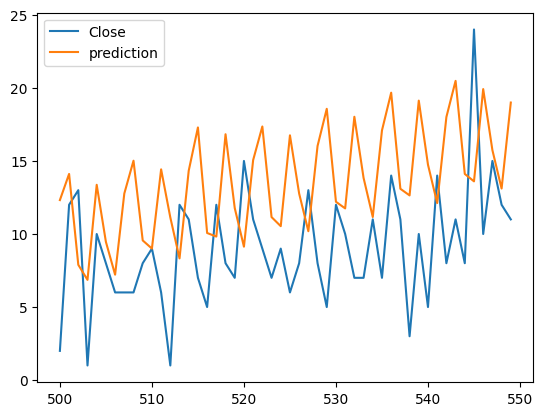

In [40]:
# Forecast for the test period
forecast = model.predict(n_periods=len(test))

forecast_list = forecast.tolist()
print(forecast_list)

# Create a DataFrame for the forecast
test_df = pd.DataFrame(test, index=forecast.index, columns=['Close'])
forecast_df = pd.DataFrame(forecast, index=forecast.index, columns=['prediction'])

# Combine test data with forecast for visualization
combined_df = pd.concat([test_df, forecast_df], axis=1)

# Plot the actual values and predictions
combined_df.plot(y=['Close', 'prediction'])  # Assuming 'Close' is the target column
# plt.title("Time Series: Actual vs. Forecast")
# plt.ylabel("Value")
# plt.xlabel("Date")
# plt.legend()
plt.show()

In [41]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

mae = mean_absolute_error(test, forecast_list)
mse = mean_squared_error(test, forecast_list)
rmse = np.sqrt(mse)

print(f"Mean Absolute Error: {mae:.4f}")
print(f"Mean Squared Error: {mse:.4f}")
print(f"Root Mean Squared Error: {rmse:.4f}")

Mean Absolute Error: 5.8285
Mean Squared Error: 47.4203
Root Mean Squared Error: 6.8862
